In [1]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib as mpl
from matplotlib.dates import MinuteLocator

sns.set_theme()

In [2]:
df = pd.DataFrame(
    {
        'Team': ['red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue'],
        'Time': ['1900-01-01 00:09:01', '1900-01-01 00:15:03', '1900-01-01 00:18:04', '1900-01-01 00:33:11', '1900-01-01 00:36:12', '1900-01-01 00:57:23', '1900-01-01 01:06:25', '1900-01-01 01:09:26', '1900-01-01 01:15:28', '1900-01-01 01:21:31', '1900-01-01 01:24:33', '1900-01-01 01:27:35']
    },
    index=[4, 8, 10, 20, 22, 36, 42, 44, 48, 52, 54, 56]
)
print(df.dtypes)
df

Team    object
Time    object
dtype: object


,Team,Time
4,red,1900-01-01 00:09:01
8,red,1900-01-01 00:15:03
10,red,1900-01-01 00:18:04
20,blue,1900-01-01 00:33:11
22,blue,1900-01-01 00:36:12
36,blue,1900-01-01 00:57:23
42,blue,1900-01-01 01:06:25
44,red,1900-01-01 01:09:26
48,red,1900-01-01 01:15:28
52,blue,1900-01-01 01:21:31


In [3]:
df2 = (df
    .assign(Team=df.Team.astype('category'),
            Time=pd.to_datetime(df.Time))
 )
print(df2.dtypes)
df2

Team          category
Time    datetime64[ns]
dtype: object


,Team,Time
4,red,1900-01-01 00:09:01
8,red,1900-01-01 00:15:03
10,red,1900-01-01 00:18:04
20,blue,1900-01-01 00:33:11
22,blue,1900-01-01 00:36:12
36,blue,1900-01-01 00:57:23
42,blue,1900-01-01 01:06:25
44,red,1900-01-01 01:09:26
48,red,1900-01-01 01:15:28
52,blue,1900-01-01 01:21:31


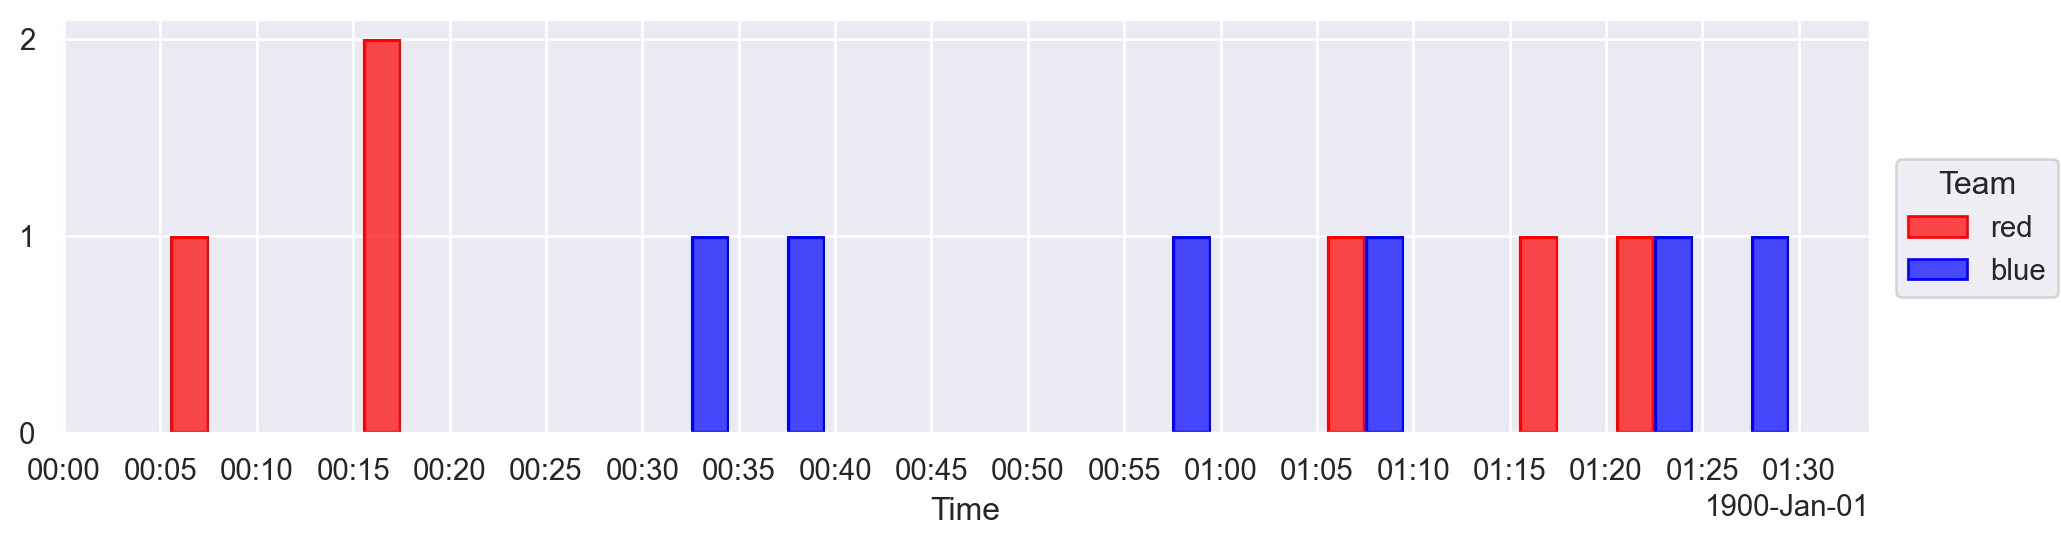

In [4]:
(
    so.Plot(df2, x="Time", color="Team")
    # Workaround: https://github.com/mwaskom/seaborn/issues/2371#issuecomment-768637786
    .add(so.Bar(), so.Hist(bins=mpl.dates.date2num(pd.date_range("1900-01-01", end="1900-01-01 02", freq='5min'))), so.Dodge())
    .scale(
        color=so.Nominal(values=["red", "blue"], order=["red", "blue"]),
        x=so.Temporal().tick(locator=MinuteLocator(interval=5)).label(concise=True),
        y=so.Continuous().tick(every=1)
    )
    .limit(x=(mpl.dates.date2num(pd.to_datetime('1900-01-01') - pd.to_timedelta(10, unit='S')), None))
    .layout(size=(10, 3))
)

In [5]:
range(12, 24, 2)


range(12, 24, 2)

In [6]:
pd.date_range("1900-01-01", end="1900-01-01 02", freq='5min').tolist()


[Timestamp('1900-01-01 00:00:00', freq='5T'),
 Timestamp('1900-01-01 00:05:00', freq='5T'),
 Timestamp('1900-01-01 00:10:00', freq='5T'),
 Timestamp('1900-01-01 00:15:00', freq='5T'),
 Timestamp('1900-01-01 00:20:00', freq='5T'),
 Timestamp('1900-01-01 00:25:00', freq='5T'),
 Timestamp('1900-01-01 00:30:00', freq='5T'),
 Timestamp('1900-01-01 00:35:00', freq='5T'),
 Timestamp('1900-01-01 00:40:00', freq='5T'),
 Timestamp('1900-01-01 00:45:00', freq='5T'),
 Timestamp('1900-01-01 00:50:00', freq='5T'),
 Timestamp('1900-01-01 00:55:00', freq='5T'),
 Timestamp('1900-01-01 01:00:00', freq='5T'),
 Timestamp('1900-01-01 01:05:00', freq='5T'),
 Timestamp('1900-01-01 01:10:00', freq='5T'),
 Timestamp('1900-01-01 01:15:00', freq='5T'),
 Timestamp('1900-01-01 01:20:00', freq='5T'),
 Timestamp('1900-01-01 01:25:00', freq='5T'),
 Timestamp('1900-01-01 01:30:00', freq='5T'),
 Timestamp('1900-01-01 01:35:00', freq='5T'),
 Timestamp('1900-01-01 01:40:00', freq='5T'),
 Timestamp('1900-01-01 01:45:00', 

In [7]:
df2.Time.dt.month


4     1
8     1
10    1
20    1
22    1
36    1
42    1
44    1
48    1
52    1
54    1
56    1
Name: Time, dtype: int64

In [8]:
df2.set_index('Time').resample('10T').count()

,Team
Time,
1900-01-01 00:00:00,1
1900-01-01 00:10:00,2
1900-01-01 00:20:00,0
1900-01-01 00:30:00,2
1900-01-01 00:40:00,0
1900-01-01 00:50:00,1
1900-01-01 01:00:00,2
1900-01-01 01:10:00,1
1900-01-01 01:20:00,3


In [23]:
df3 = (df2
    .set_index('Time').resample('5T').apply(list).explode("Team")
)
df3

,Team
Time,
1900-01-01 00:05:00,red
1900-01-01 00:10:00,NaN
1900-01-01 00:15:00,red
1900-01-01 00:15:00,red
1900-01-01 00:20:00,NaN
1900-01-01 00:25:00,NaN
1900-01-01 00:30:00,blue
1900-01-01 00:35:00,blue
1900-01-01 00:40:00,NaN


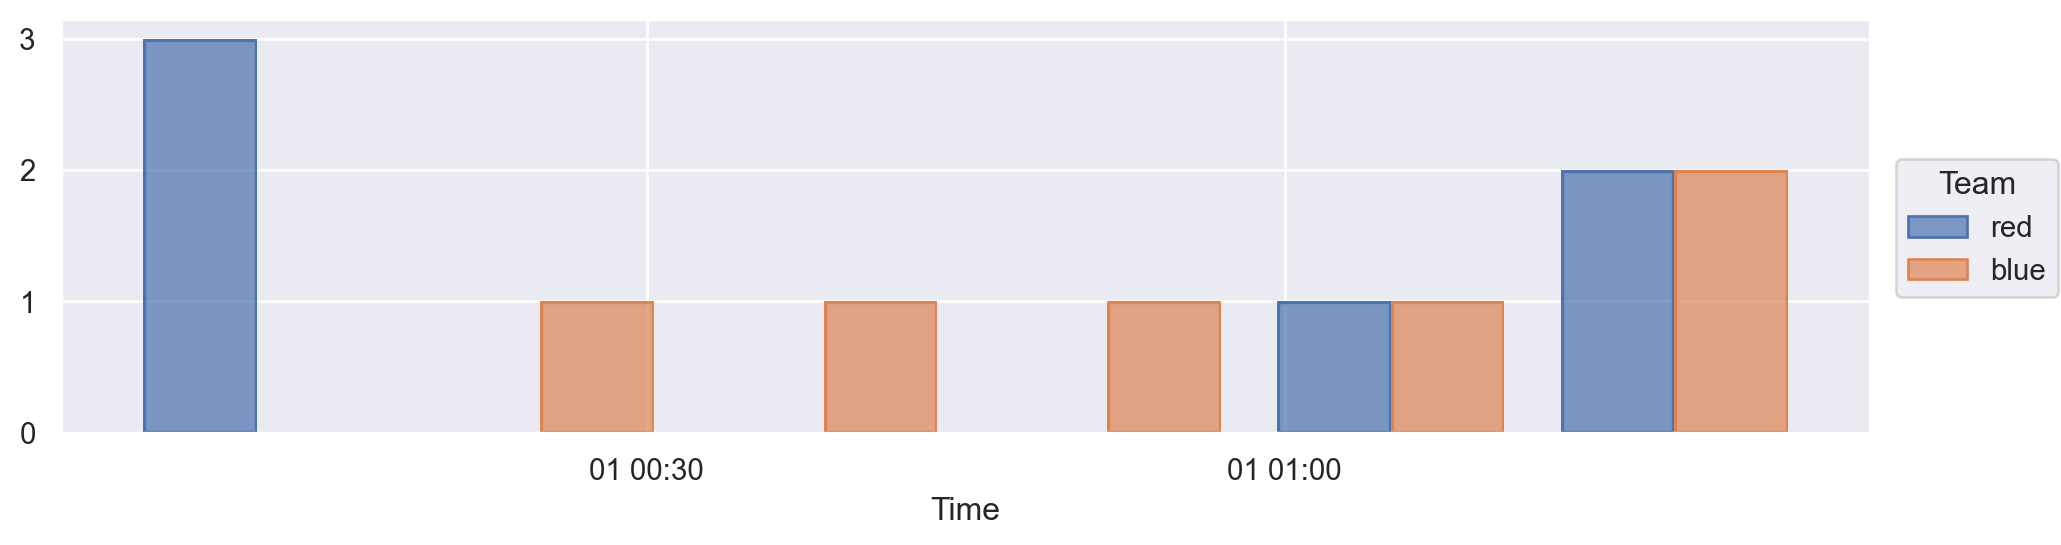

In [20]:
(
    so.Plot(df3, x="Time", color="Team")
    # Workaround: https://github.com/mwaskom/seaborn/issues/2371#issuecomment-768637786
    .add(so.Bar(), so.Hist(), so.Dodge())
    .scale(
        y=so.Continuous().tick(every=1)
    )
    .layout(size=(10, 3))
)

In [17]:
(df2.set_index('Time').resample('20T').apply(lambda x: list(x)).explode("Team")
    .assign(Time=lambda x: pd.to_numeric(x.Time))
 )


AttributeError: 'DataFrame' object has no attribute 'Time'

In [ ]:
# https://stackoverflow.com/questions/56107039/how-to-resample-and-have-value-counts-with-value-as-new-column-header-and-counts
df2.set_index('Time').groupby('Team').resample('20T').count().unstack(fill_value=0, level=0).melt(ignore_index=False)

In [ ]:
(
    so.Plot(df2.set_index('Time').resample('5T').apply(lambda x: list(x)).explode("Team"),
        x="Time",
        color="Team"
    )
    .add(so.Bar(), so.Hist(), so.Dodge())
    .scale(
        color=so.Nominal(values=["red", "blue"], order=["red", "blue"]),
        x=so.Temporal().tick(locator=MinuteLocator(interval=5)).label(concise=True),
        y=so.Continuous().tick(every=1)
    )
    .layout(size=(10, 3))
)

In [ ]:
mpl.dates.datestr2num('1900-01-01')


In [ ]:
mpl.dates.date2num(pd.to_datetime('2000-01-01') - pd.to_timedelta(1, unit='D'))
